## 데이터 분석


In [ ]:
from util import preprocessing_simple_train
from util import preprocessing_simple_test

train_df = preprocessing_simple_train()
test_df = preprocessing_simple_test()

<Axes: xlabel='index', ylabel='rainfall_train.vv'>

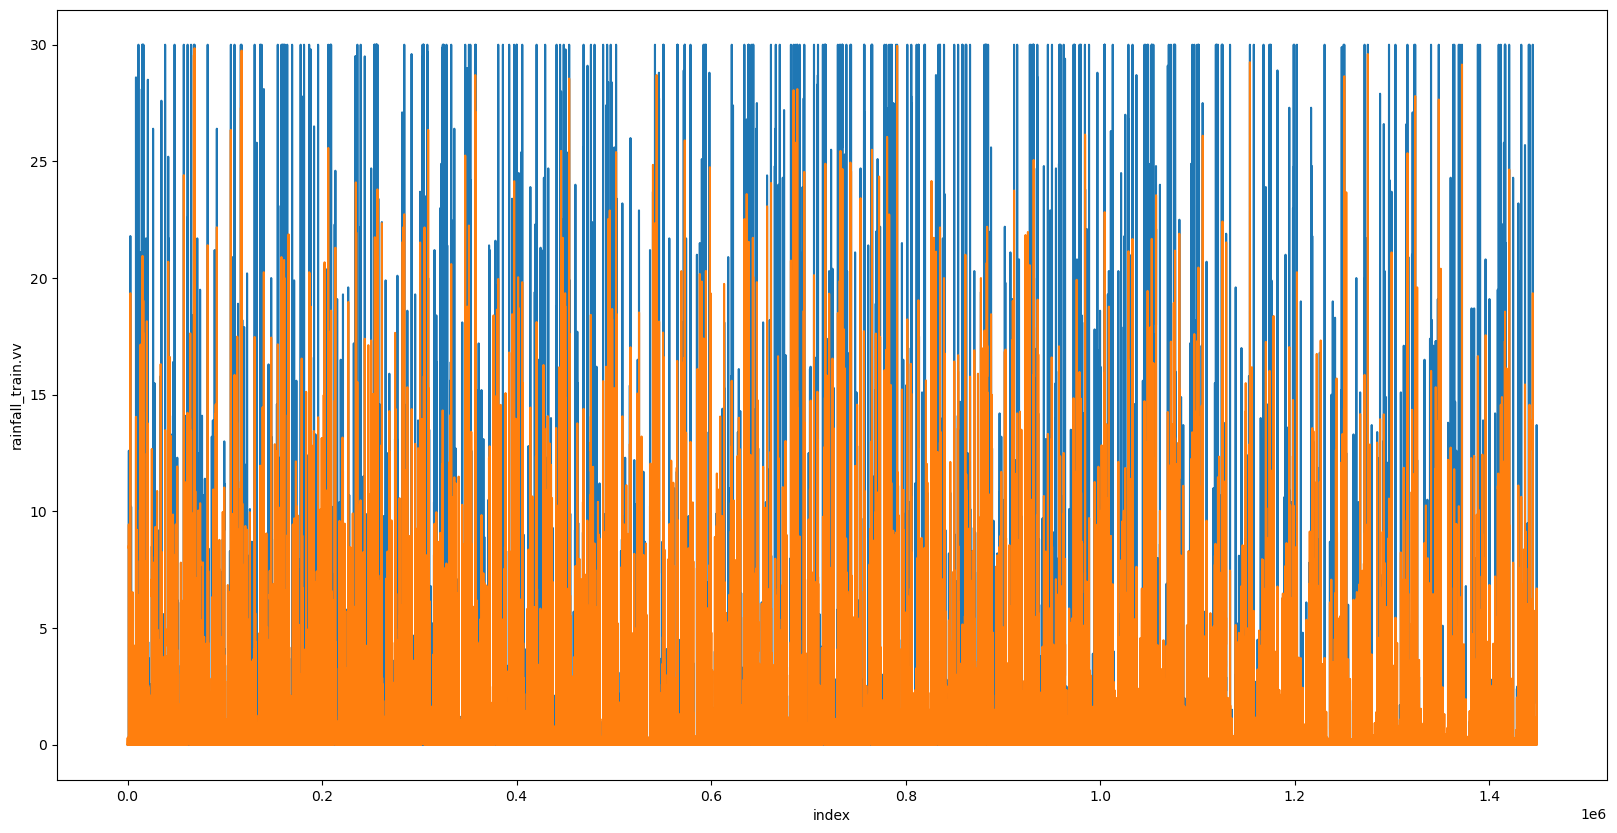

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from util import month_to_day
import numpy as np



train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']


tmp = train_df[['rainfall_train.stn4contest','rainfall_train.ef_year','day','rainfall_train.ef_hour','rainfall_train.vv','v_median']].copy()
tmp['rainfall_train.vv']= np.where(tmp['rainfall_train.vv'] <30, tmp['rainfall_train.vv'], 30)
train_df['rainfall_train.vv']= np.where(train_df['rainfall_train.vv'] <30, train_df['rainfall_train.vv'], 30)
tmp['index'] = tmp.index
plt.figure(figsize=(20,10))
sns.lineplot(x='index',y='rainfall_train.vv',data=tmp)
sns.lineplot(x='index',y='v_median',data=tmp)


<Axes: xlabel='day', ylabel='rainfall_train.vv'>

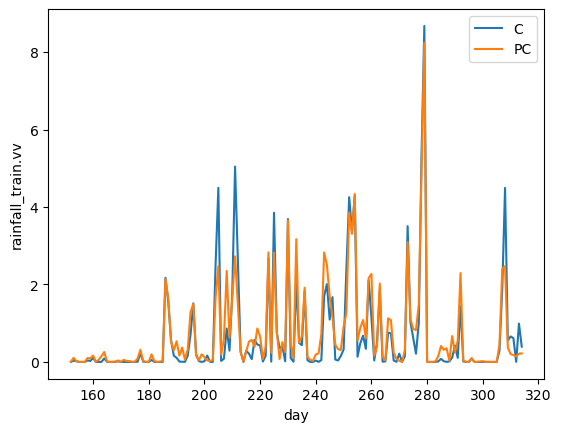

In [ ]:
_A = train_df[train_df['rainfall_train.ef_year'] == 'A']
_B = train_df[train_df['rainfall_train.ef_year'] == 'B']
_C = train_df[train_df['rainfall_train.ef_year'] == 'C']



# sns.lineplot(x='day',y='rainfall_train.vv', data=_A.groupby(by=['day'])['rainfall_train.vv'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='A')
# sns.lineplot(x='day',y='rainfall_train.vv', data=_B.groupby(by=['day'])['rainfall_train.vv'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='B')
sns.lineplot(x='day',y='rainfall_train.vv', data=_C.groupby(by=['day'])['rainfall_train.vv'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='C')
# sns.lineplot(x='day',y='v_median', data=_A.groupby(by=['day'])['v_median'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='PA')
# sns.lineplot(x='day',y='v_median', data=_B.groupby(by=['day'])['v_median'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='PB')
sns.lineplot(x='day',y='v_median', data=_C.groupby(by=['day'])['v_median'].mean().reset_index().rolling(window=1,win_type='hann',on='day').mean(), label='PC')




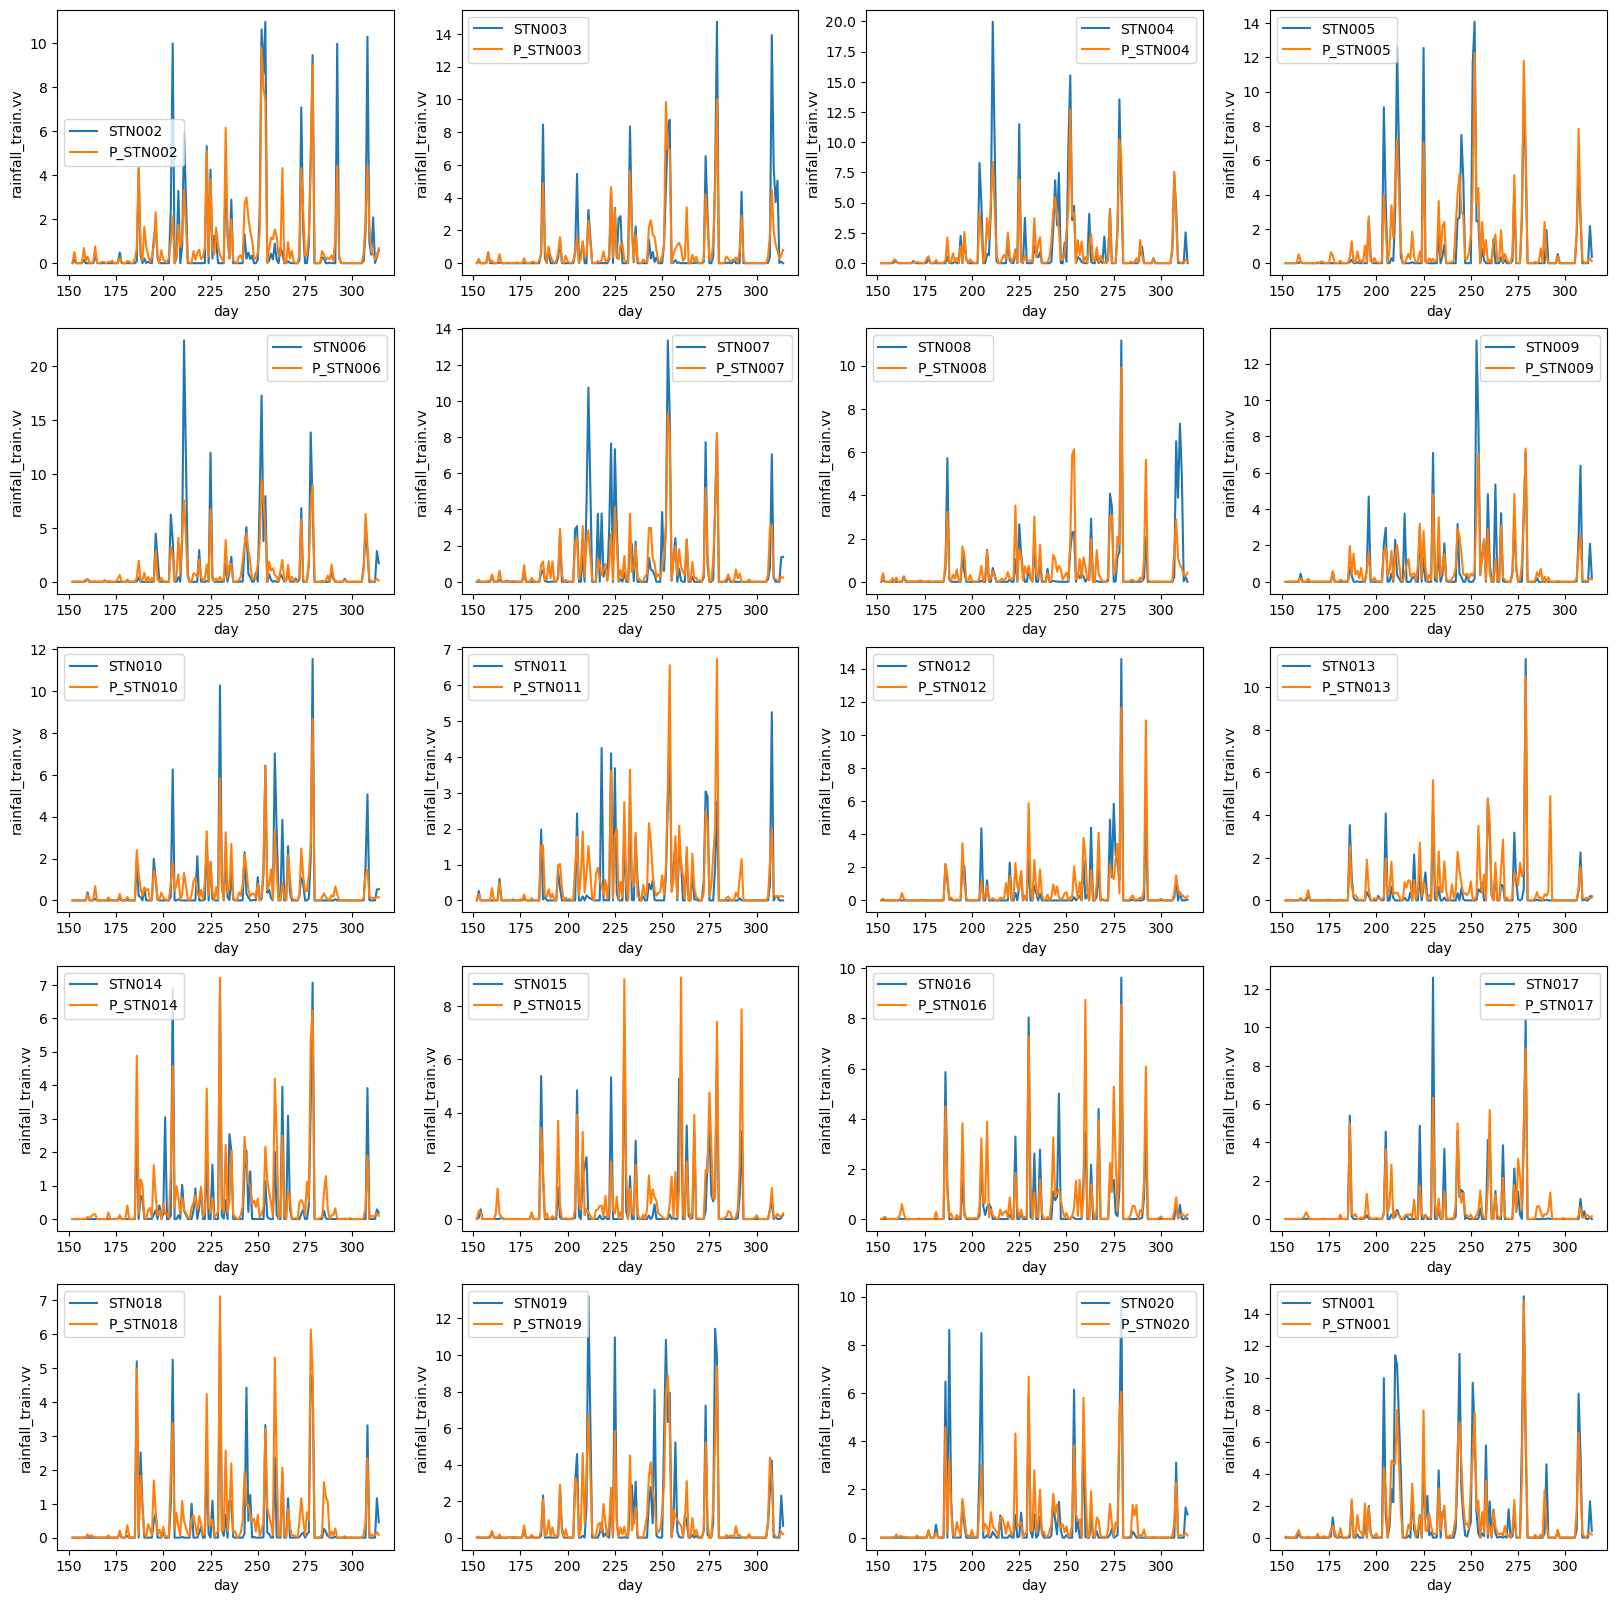

In [ ]:
fig, axes = plt.subplots(5,4,figsize=(20,20))
for idx,i in enumerate([f"STN{format(i,'03')}" for i in range(1,21)]):
    sns.lineplot(x='day', y='rainfall_train.vv', data=_C[_C['rainfall_train.stn4contest'] == i].groupby(by=['day'])['rainfall_train.vv'].mean().reset_index(),label=i, ax=axes[(idx-1)//4, (idx-1)%4])
    sns.lineplot(x='day', y='v_median', data=_C[(_C['rainfall_train.stn4contest'] == i)].groupby(by=['day'])['v_median'].mean().reset_index(),label=f"P_{i}", ax=axes[(idx-1)//4, (idx-1)%4])


In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns

tmp = train_df.groupby(by=['index','rainfall_train.dh_x'])['v_median'].mean().reset_index()



<Figure size 2000x1000 with 0 Axes>

In [ ]:
tmp2 = (tmp.groupby(by=['index'])['rainfall_train.dh_x'].count() >= 2).reset_index()

tmp2[tmp2['rainfall_train.dh_x'] == True]

,index,rainfall_train.dh_x
96,1316,True
97,1317,True
98,1318,True
99,1319,True
100,1320,True
101,1321,True
102,1322,True
103,1323,True
104,1324,True
105,1325,True


In [ ]:
tmp[tmp['index'] == 1316]

,index,rainfall_train.dh_x,v_median
96,1316,3,0.152163
97,1316,15,0.000000


<Axes: xlabel='rainfall_train.ef_hour', ylabel='rainfall_train.class_interval'>

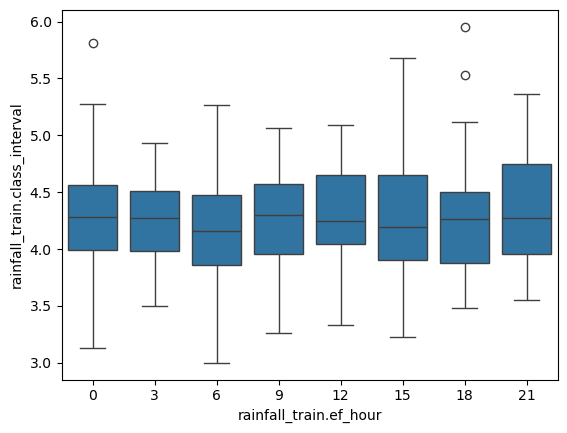

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.boxplot(x='rainfall_train.ef_hour',y='rainfall_train.class_interval', data=train_df[train_df['rainfall_train.class_interval']!=0].groupby(by=['rainfall_train.ef_year','rainfall_train.stn4contest','rainfall_train.ef_hour'])['rainfall_train.class_interval'].mean().reset_index())

In [ ]:
from util import month_to_day

train_df['index'] = (month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']) *8 + (train_df['rainfall_train.ef_hour'] //3)

index
1220    0.383333
1221    0.350000
1222    0.466667
1223    0.288136
1224    0.383333
          ...   
2515    0.450000
2516    0.283333
2517    0.728814
2518    0.966667
2519    1.150000
Name: rainfall_train.class_interval, Length: 1284, dtype: float64

In [ ]:
train_df.groupby(by=['index'])['rainfall_train.class_interval'].mean()

index
1220    0.383333
1221    0.350000
1222    0.466667
1223    0.288136
1224    0.383333
          ...   
2515    0.450000
2516    0.283333
2517    0.728814
2518    0.966667
2519    1.150000
Name: rainfall_train.class_interval, Length: 1284, dtype: float64

In [ ]:
train_df['index'].sort_values().unique()

array([1220, 1221, 1222, ..., 2517, 2518, 2519])

In [ ]:
from util import month_to_day

train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']

[]

<Figure size 2000x500 with 0 Axes>

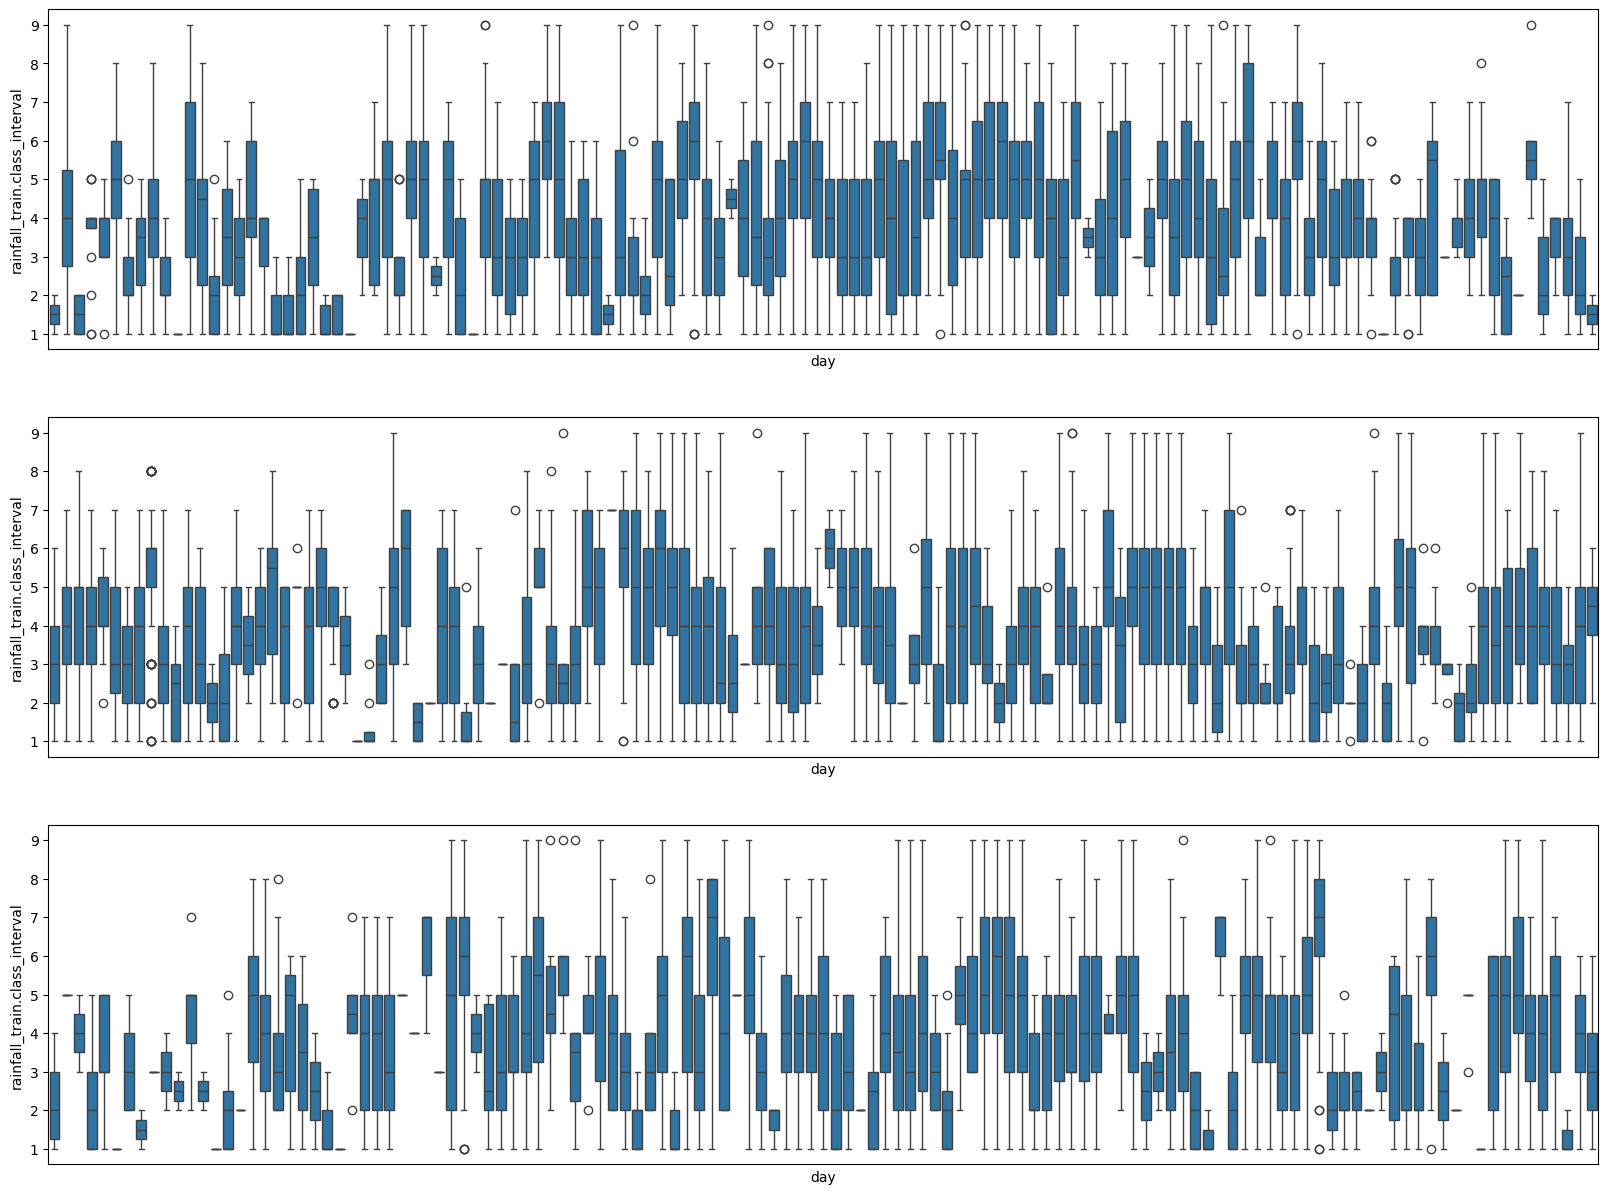

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from util import make_day2freqclass

plt.figure(figsize=(20,5))
fig, axes = plt.subplots(nrows=3, figsize=(20,15))
tmp_train = train_df[train_df['rainfall_train.class_interval']!=0]
_A = tmp_train[tmp_train["rainfall_train.ef_year"] == "A"]
_B = tmp_train[tmp_train["rainfall_train.ef_year"] == "B"]
_C = tmp_train[tmp_train["rainfall_train.ef_year"] == "C"]


sns.boxplot(x='day',y='rainfall_train.class_interval', data=_A, ax=axes[0])
sns.boxplot(x='day',y='rainfall_train.class_interval', data=_B, ax=axes[1])
sns.boxplot(x='day',y='rainfall_train.class_interval', data=_C, ax=axes[2])

axes[0].set_xticks([])
axes[1].set_xticks([])
axes[2].set_xticks([])




In [ ]:
tmp_train.columns

Index(['rainfall_train.stn4contest', 'rainfall_train.dh_x',
       'rainfall_train.ef_year', 'rainfall_train.ef_month',
       'rainfall_train.ef_day', 'rainfall_train.ef_hour', 'rainfall_train.v01',
       'rainfall_train.v02', 'rainfall_train.v03', 'rainfall_train.v04',
       'rainfall_train.v05', 'rainfall_train.v06', 'rainfall_train.v07',
       'rainfall_train.v08', 'rainfall_train.v09', 'rainfall_train.vv',
       'rainfall_train.class_interval', 'rainfall_train.v00', 'v_max',
       'v_median', 'day'],
      dtype='object')

<Axes: xlabel='day', ylabel='rainfall_train.class_interval'>

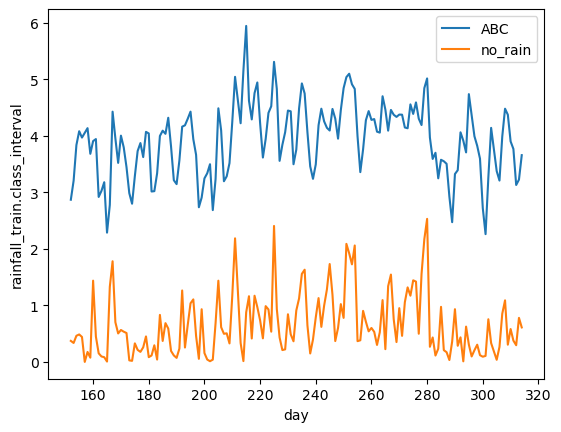

In [ ]:
from util import make_day2class
import matplotlib.pyplot as plt
import seaborn as sns

# sns.lineplot(x='day',y='rainfall_train.class_interval',data=make_day2class(_A).rolling(window=1,center=True,min_periods=1, on='day').median(), label='A')
# sns.lineplot(x='day',y='rainfall_train.class_interval',data=make_day2class(_B).rolling(window=1,center=True,min_periods=1, on='day').median(), label='B')
# sns.lineplot(x='day',y='rainfall_train.class_interval',data=make_day2class(_C).rolling(window=1,center=True,min_periods=1, on='day').median(), label='C')
sns.lineplot(x='day',y='rainfall_train.class_interval',data=make_day2class(tmp_train).rolling(window=2,center=True,min_periods=1, on='day').median(), label='ABC')



sns.lineplot(x='day',y='rainfall_train.class_interval',data=make_day2class(train_df),label='no_rain')



<Axes: xlabel='rainfall_train.ef_month', ylabel='rainfall_train.class_interval'>

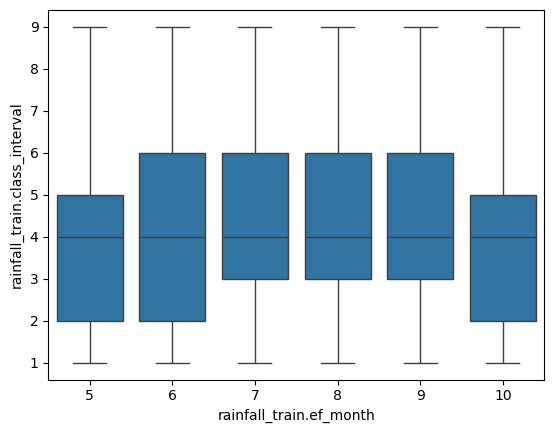

In [ ]:
sns.boxplot(x='rainfall_train.ef_month',y='rainfall_train.class_interval',data=tmp_train)

In [ ]:
_A.groupby(by=['day'])['rainfall_train.class_interval'].median().reset_index()

,day,rainfall_train.class_interval
0,153,1.5
1,154,4.0
2,155,1.5
3,156,4.0
4,159,4.0
...,...,...
121,305,2.0
122,306,4.0
123,307,3.0
124,308,2.0


<Axes: xlabel='day', ylabel='rainfall_train.class_interval'>

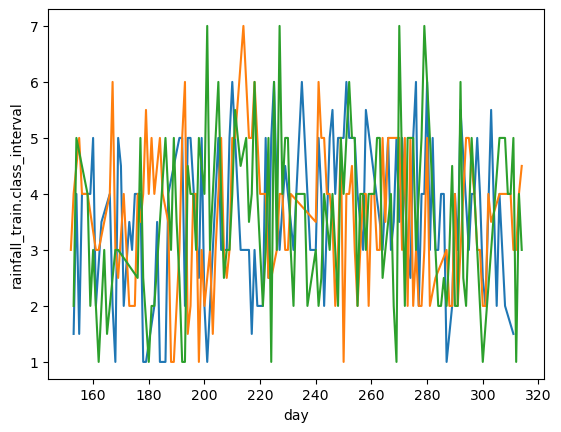

In [ ]:
sns.lineplot(x='day', y='rainfall_train.class_interval', data= _A.groupby(by=['day'])['rainfall_train.class_interval'].median().reset_index())
sns.lineplot(x='day', y='rainfall_train.class_interval', data= _B.groupby(by=['day'])['rainfall_train.class_interval'].median().reset_index())
sns.lineplot(x='day', y='rainfall_train.class_interval', data= _C.groupby(by=['day'])['rainfall_train.class_interval'].median().reset_index())



### 무강수 데이터 월별 분포 보기

In [ ]:
#결측치 제거 8490개
rainfall_train= rainfall_train[rainfall_train['rainfall_train.class_interval'] != -999]
#결측치 제거된 데이터 개수 1457252 : 1223315
non_rainfall=rainfall_train[rainfall_train['rainfall_train.class_interval'] == 0]

NameError: name 'rainfall_train' is not defined

array([[<Axes: title={'center': 'rainfall_train.ef_month'}>]],
      dtype=object)

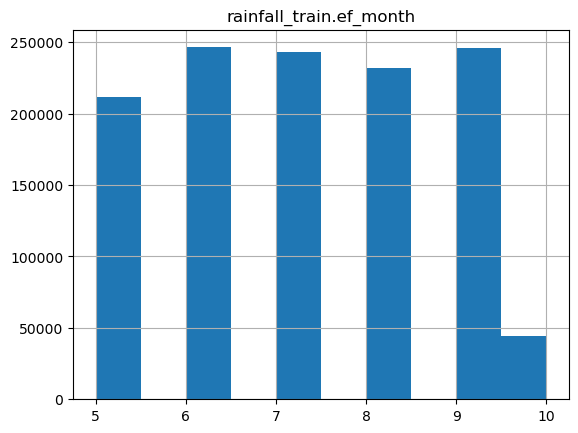

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

non_rainfall.hist(column=['rainfall_train.ef_month'])

<Axes: xlabel='rainfall_train.ef_hour'>

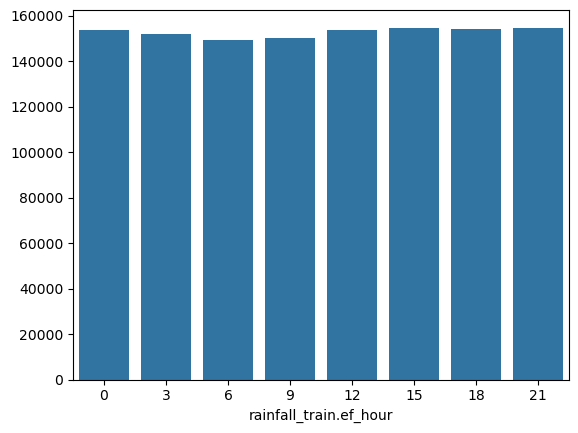

In [ ]:
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(8))
x = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().index
y = non_rainfall.groupby(by=['rainfall_train.ef_hour'])['rainfall_train.v01'].count().values

sns.barplot(x=x,y=y)


/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')


/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')


/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')
Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')


/tmp/ipykernel_1935/1561415971.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)


Index([5, 6, 7, 8, 9, 10], dtype='int64', name='rainfall_train.ef_month')

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarn

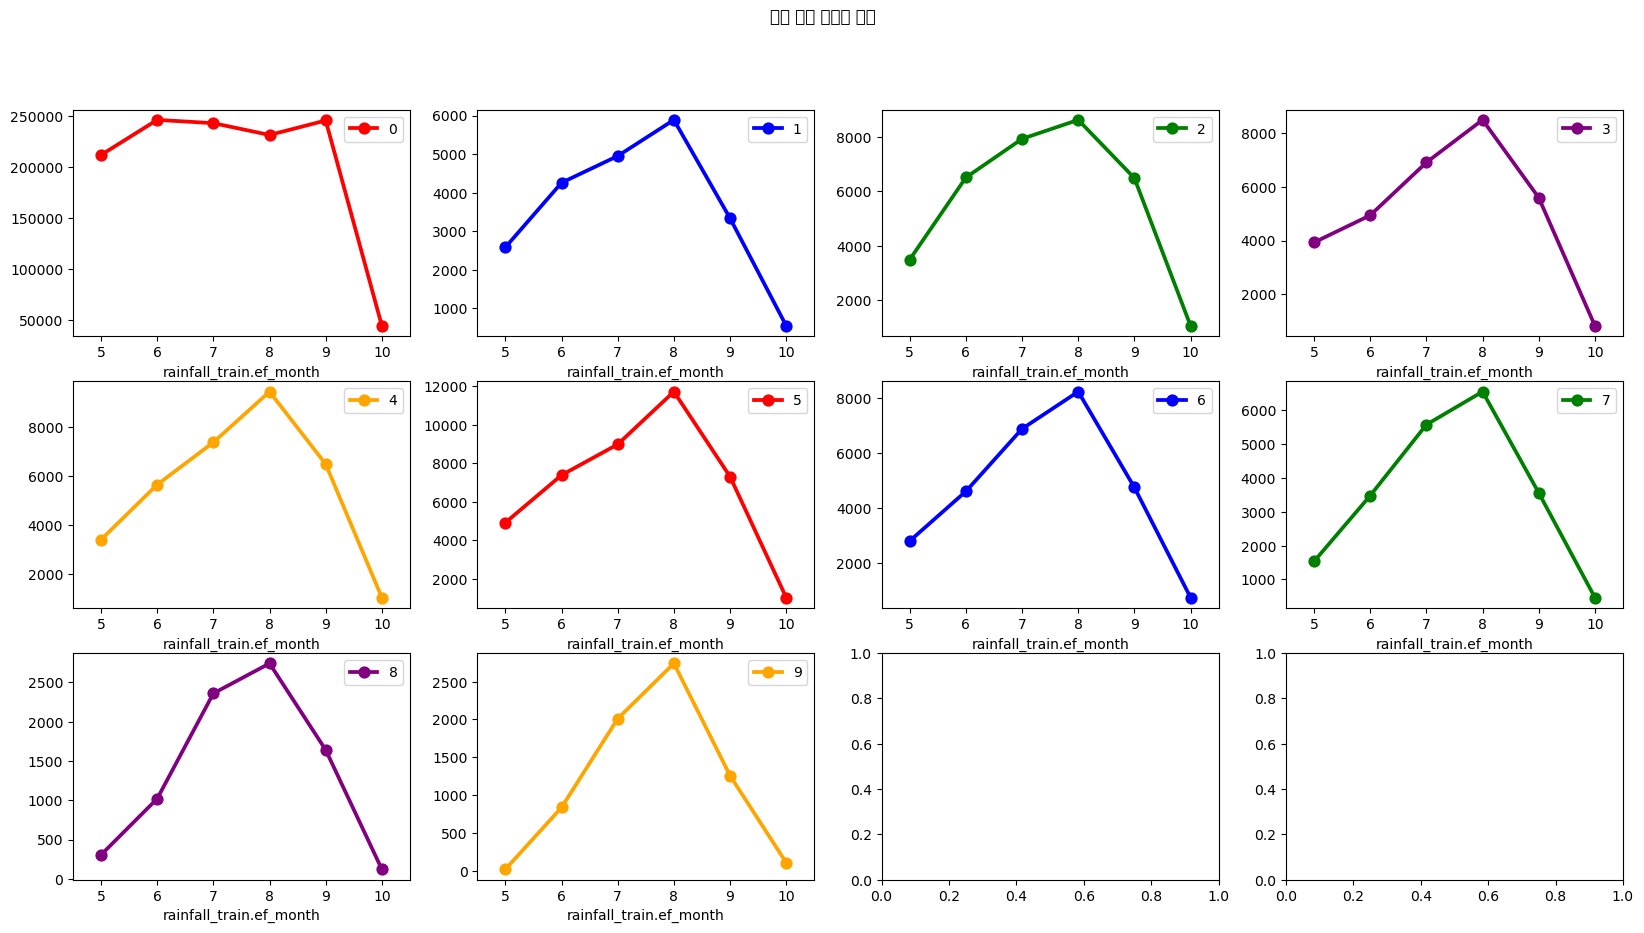

In [ ]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_month'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
    print(tmp.index)
fig.suptitle("월별 강수 데이터 분포")
tmp.index

/tmp/ipykernel_1935/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//4,i%4].set_xticklabels(tmp.index)
/tmp/ipykernel_1935/4248904066.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLoc

Index([0, 3, 6, 9, 12, 15, 18, 21], dtype='int64', name='rainfall_train.ef_hour')

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarni

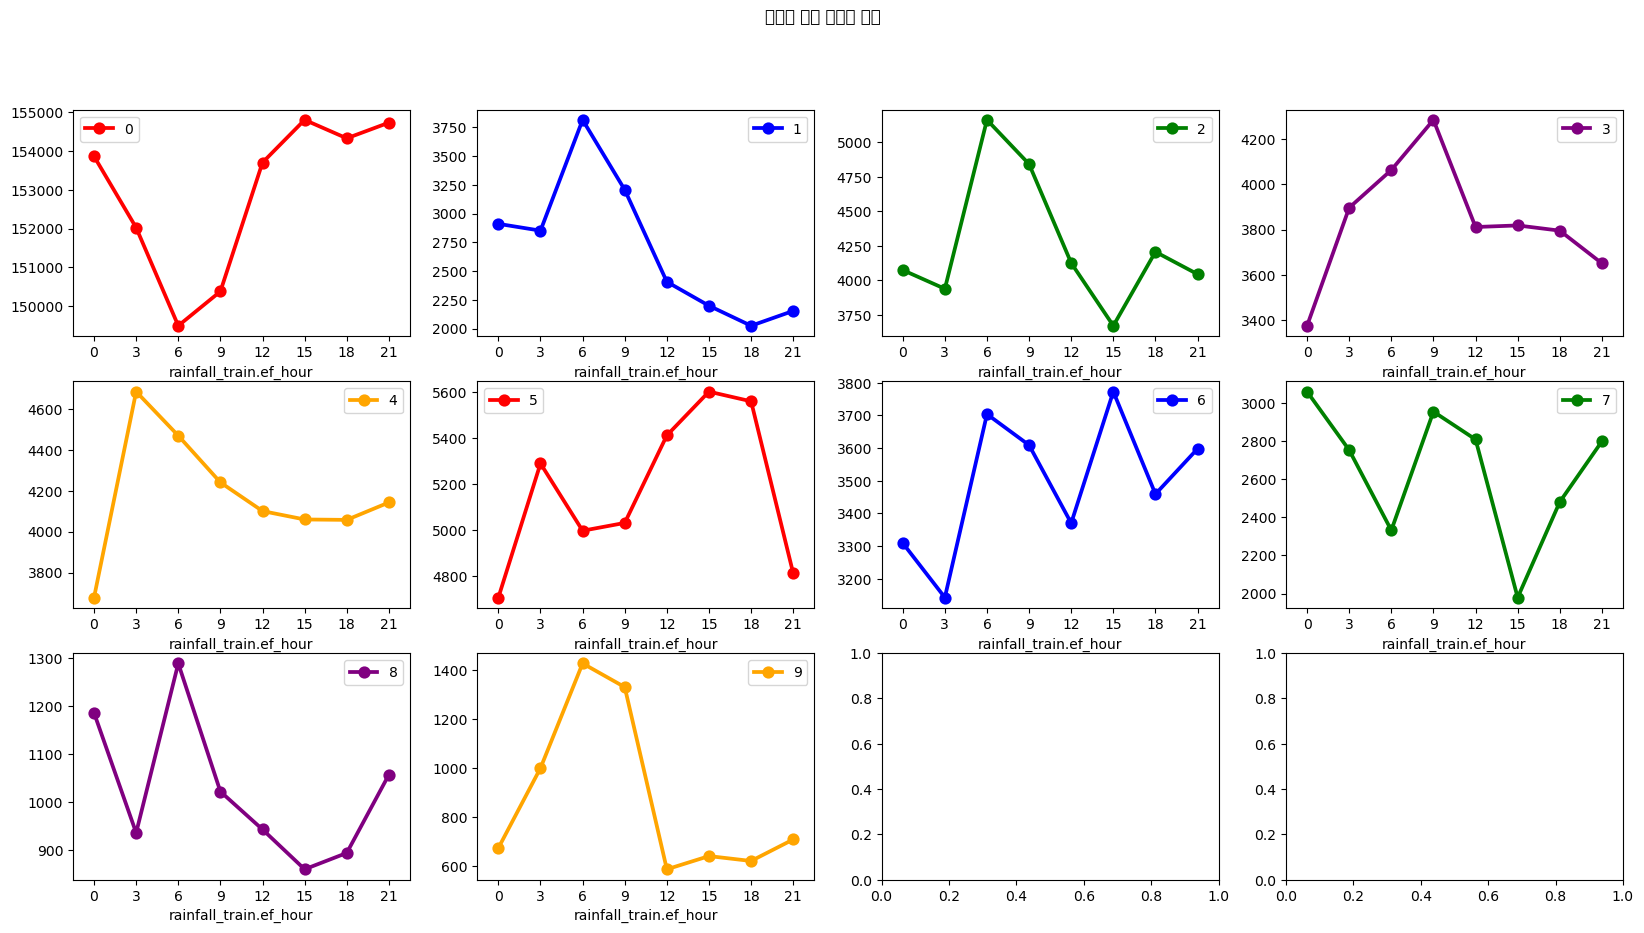

In [ ]:
import numpy as np

fig, axes = plt.subplots(3,4, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_hour'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//4,i%4], color=color)
    axes[i//4,i%4].set_xticklabels(tmp.index)
fig.suptitle("시간별 강수 데이터 분포")
tmp.index

/tmp/ipykernel_1935/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_1935/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_1935/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_1935/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
/tmp/ipykernel_1935/3434335901.py:10: UserWarning: set_ticklabels() should only be used with a fixed number 

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64', name='rainfall_train.ef_day')

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarnin

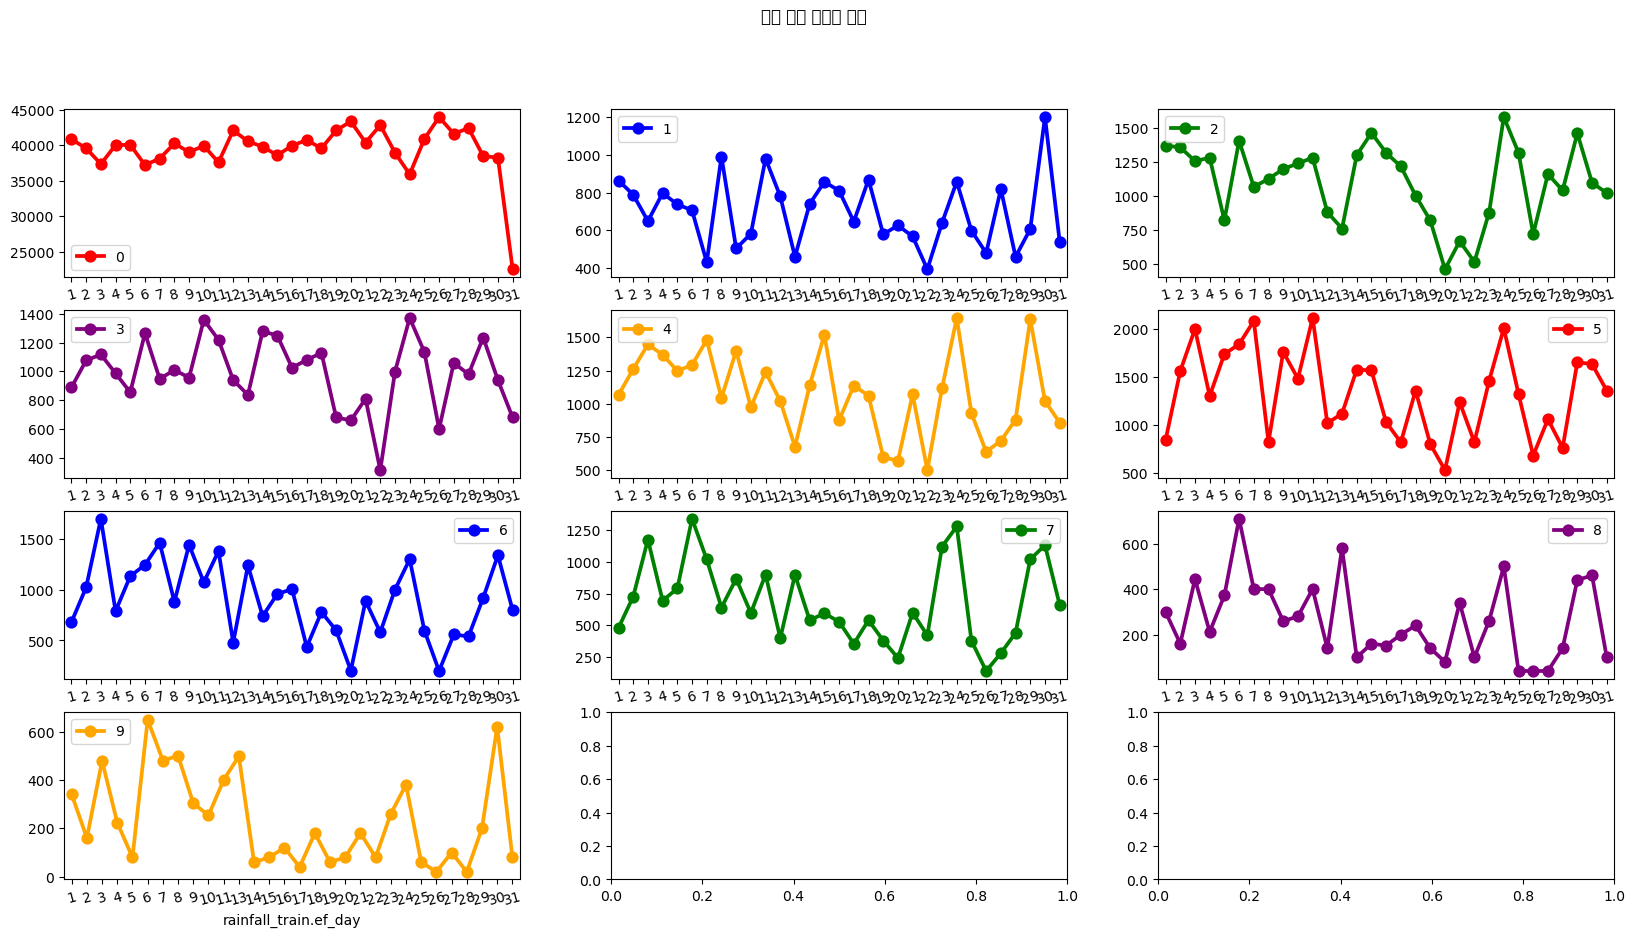

In [ ]:
import numpy as np

fig, axes = plt.subplots(4,3, figsize=(20,10))

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(10):
    color = colors[i%len(colors)]
    tmp = rainfall_train[rainfall_train['rainfall_train.class_interval'] == i]['rainfall_train.ef_day'].value_counts().sort_index()
    sns.pointplot(x= tmp.index,y= tmp.values,label= i , ax=axes[i//3,i%3], color=color)
    axes[i//3,i%3].set_xticklabels(tmp.index, rotation=15)
fig.suptitle("일별 강수 데이터 분포")
tmp.index

## 지점 데이터 변수 확인

- test 데이터와 train 데이터에서 지점의 이름이 다른 것을 확인
- 지점별로 데이터가 바뀌지 않음을 확인해야 함.

In [ ]:
import pandas as pd
df = pd.read_csv('./data/daegun_first.csv')

In [ ]:
df=df[~(df['class'] == -999)]

In [ ]:
df['year'] = df['TM_EF'].apply(lambda x: x[0])

Text(0.5, 0.98, '년도별 평균 실강수량 분포 가시화')

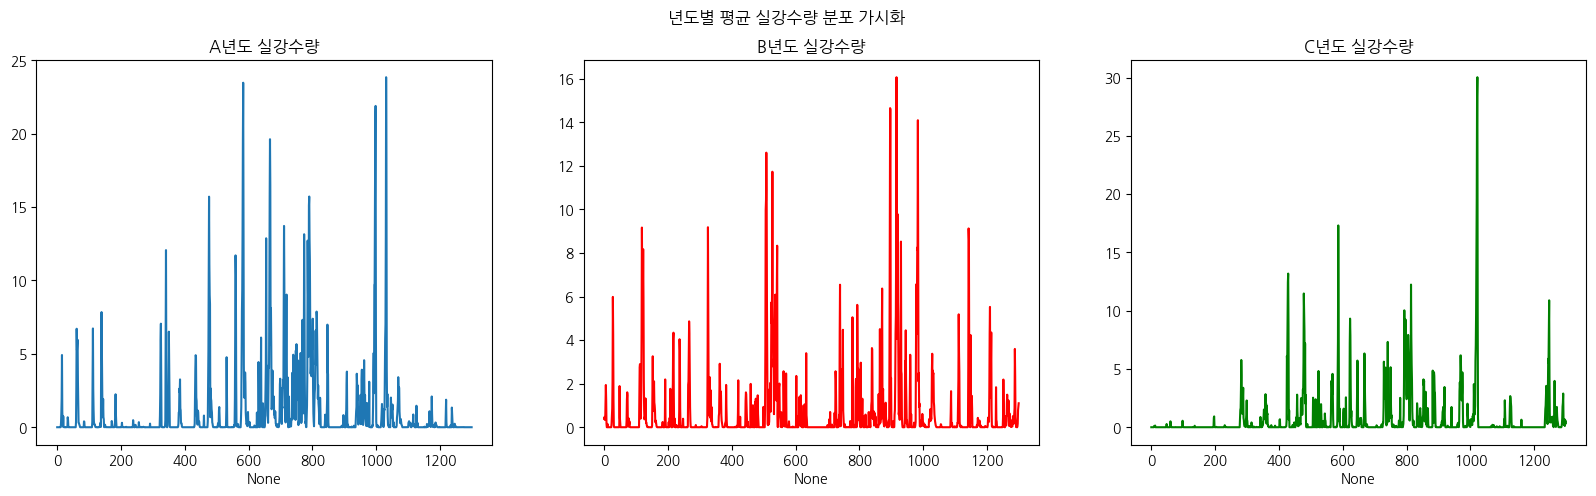

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = "NanumGothic"
fig, axes = plt.subplots(ncols=3, figsize=(20,5))
A_df = df[df['year'] == 'A']
tmp =A_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[0])
axes[0].set_title("A년도 실강수량")

B_df = df[df['year'] == 'B']
tmp =B_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[1],color='red')
axes[1].set_title("B년도 실강수량")

C_df = df[df['year'] == 'C']
tmp =C_df.groupby(by=['TM_EF'])['VV'].mean().reset_index(drop=True)
sns.lineplot(x=tmp.index,y=tmp.values,ax=axes[2], color='green')
axes[2].set_title("C년도 실강수량")

fig.suptitle("년도별 평균 실강수량 분포 가시화")


In [ ]:
tmp_df = df[(df["DH"] == 3) & (df["EF_class"] == 0)]["TM_EF"]

## 무강수 데이터 처리

Text(0.5, 1.0, 'V0의 변화량에 따른 무강수 데이터의 분포')

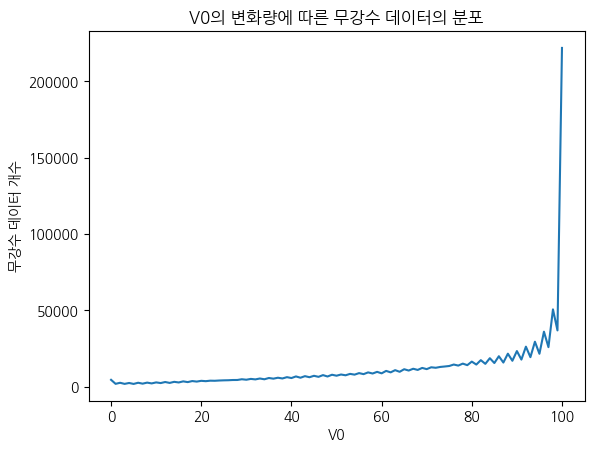

In [ ]:
sns.lineplot(df[df['class'] == 0]['V0'].value_counts().sort_index())
plt.xlabel("V0")
plt.ylabel("무강수 데이터 개수")
plt.title("V0의 변화량에 따른 무강수 데이터의 분포")

In [ ]:
print(f"전체 데이터         : {len(df)}")
print(f"무강수 100% 데이터  : {(df['V0'] == 100).sum()}")
print(f"무강수 100% 비율    : {(df['V0'] == 100).sum()/len(df)}")


전체 데이터         : 1448762
무강수 100% 데이터  : 222544
무강수 100% 비율    : 0.15360977165331505


### 무강수 100% 중 실제 무강수/강수 데이터 분포


In [ ]:
print(f"전체 데이터    : {len(df[df['V0'] == 100])}")
print(f"무강수 데이터  : {(df[df['V0'] == 100]['class'] == 0).sum()}")
print(f"무강수 비율    : {(df[df['V0'] == 100]['class'] == 0).sum() / len(df[df['V0'] == 100])}")
# (df[df['V0'] == 100]['class'] == 0).sum() / len(df[df['V0'] == 100])

전체 데이터    : 222544
무강수 데이터  : 221909
무강수 비율    : 0.9971466316773312


Text(0.5, 1.0, 'V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화')

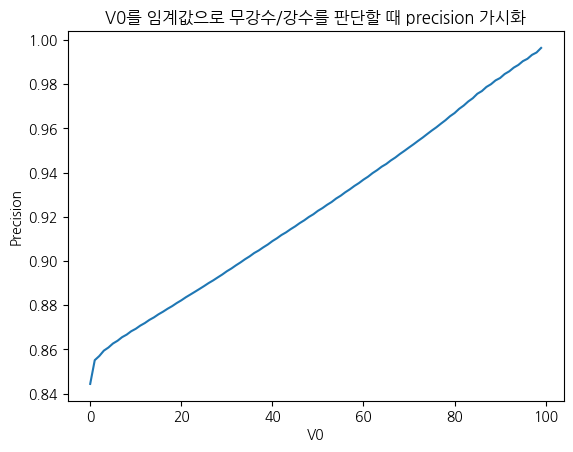

In [ ]:
import numpy as np
# V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화
y = []
for i in np.arange(100):
    y.append((df[df['V0'] >= i]['class'] == 0).sum()/len(df[df['V0'] >= i]))
sns.lineplot(x=np.arange(100),y=np.array(y))
plt.ylabel("Precision")
plt.xlabel("V0")
plt.title("V0를 임계값으로 무강수/강수를 판단할 때 precision 가시화")

## LSTM을 위한 데이터 분석

- 시계열적으로 데이터를 분석하기 위해서 몇가지 변수를 집계할 필요가 있다.
    - STN, DH(TM_FC)
- STN이 같은 데이터에 한해서 DH의 변수량이 실제 데이터에 주는 영향도를 분석할 필요가 있다.
    - DH가 3인 데이터에 한해서 나머지 변수들로 실제 강수량을 맞추는 회귀 분석을 통하여 DH를 제외한 각 변수의 영향도 파악
    - 위의 모델과 DH가 다른 데이터들을 통해서, DH 영향도 파악

In [ ]:
df.groupby('TM_EF').nunique()

,TM_FC,DH,VV,STN,V1,V2,V3,V4,V5,V6,V7,V8,V9,class,V0,EF_class,year
TM_EF,,,,,,,,,,,,,,,,,
A년05월01일12시,1,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
A년05월01일15시,1,1,1,20,2,1,1,1,1,1,1,1,1,1,2,1,1
A년05월01일18시,1,1,1,20,2,2,1,1,1,1,1,1,1,1,2,1,1
A년05월01일21시,1,1,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
A년05월02일00시,2,2,1,20,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C년10월10일09시,2,2,7,20,8,12,9,7,7,3,3,1,1,5,21,1,1
C년10월10일12시,1,1,4,20,9,10,8,6,4,2,2,1,1,4,12,1,1
C년10월10일15시,1,1,7,19,9,9,8,6,4,2,2,1,1,4,12,1,1


>   모델 결정을 위한 시각적 분석

### simple 데이터 분석

In [ ]:
import pandas as pd

train_file_path = './data/rainfall_train.csv'

from util import preprocessing_simple_train, make_day2class, month_to_day

train_df = preprocessing_simple_train()
train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']

tmp_df = pd.read_csv(train_file_path).drop(columns=['Unnamed: 0'])
tmp_df['day'] = month_to_day(tmp_df['rainfall_train.ef_month']) + tmp_df['rainfall_train.ef_day']


#### 각 지점별 클래스 label 확인

In [ ]:
from util import make_mean
import matplotlib.pyplot as plt
import seaborn as sns

tmp = make_mean(train_df,15)





<Axes: xlabel='rainfall_train.stn4contest', ylabel='v_median'>

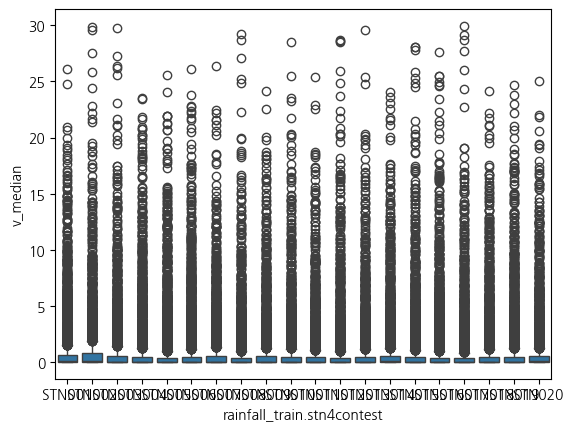

In [ ]:
sns.boxplot(x='rainfall_train.stn4contest',y='v_median',data=tmp)

### 일자별로 강수계급 데이터 분석

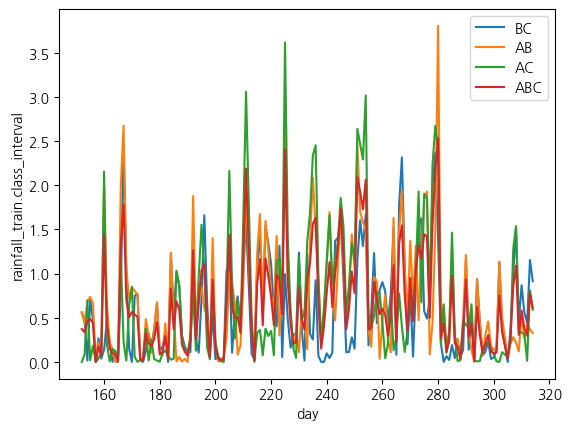

In [ ]:

import matplotlib.pyplot as plt 
import seaborn as sns
BC = train_df[train_df['rainfall_train.ef_year'] != 'A']
AC = train_df[train_df['rainfall_train.ef_year'] != 'B']
AB = train_df[train_df['rainfall_train.ef_year'] != 'C']

t_BC = tmp_df[tmp_df['rainfall_train.ef_year'] != 'A']
t_AC = tmp_df[tmp_df['rainfall_train.ef_year'] != 'B']
t_AB = tmp_df[tmp_df['rainfall_train.ef_year'] != 'C']


BC_data = make_day2class(BC)
AB_data = make_day2class(AB)
AC_data = make_day2class(AC)
ABC_data = make_day2class(train_df)
t_BC_data = make_day2class(t_BC)
t_AB_data = make_day2class(t_AB)
t_AC_data = make_day2class(t_AC)
t_ABC_data = make_day2class(tmp_df)


sns.lineplot(x=BC_data['day'],y=BC_data['rainfall_train.class_interval'],label='BC')
sns.lineplot(x=AB_data['day'],y=AB_data['rainfall_train.class_interval'],label='AB')
sns.lineplot(x=AC_data['day'],y=AC_data['rainfall_train.class_interval'],label='AC')
sns.lineplot(x=ABC_data['day'],y=ABC_data['rainfall_train.class_interval'],label='ABC')

# sns.kdeplot(x=BC_data['rainfall_train.class_interval'],label='BC')
# sns.kdeplot(x=AB_data['rainfall_train.class_interval'],label='AB')
# sns.kdeplot(x=AC_data['rainfall_train.class_interval'],label='AC')
# sns.kdeplot(x=ABC_data['rainfall_train.class_interval'],label='ABC')
# sns.kdeplot(x=t_BC_data['rainfall_train.class_interval'],label='t_BC')
# sns.kdeplot(x=t_AB_data['rainfall_train.class_interval'],label='t_AB')
# sns.kdeplot(x=t_AC_data['rainfall_train.class_interval'],label='t_AC')
# sns.kdeplot(x=t_ABC_data['rainfall_train.class_interval'],label='t_ABC')
plt.legend()

## 테스트 데이터 분석


In [42]:
from util import preprocessing_simple_test, preprocessing_simple_train


test_df = preprocessing_simple_test()
train_df = preprocessing_simple_train()


In [43]:
from util import month_to_day

test_df['day'] = month_to_day(test_df['rainfall_test.ef_month']) + test_df['rainfall_test.ef_day']
train_df['day'] = month_to_day(train_df['rainfall_train.ef_month']) + train_df['rainfall_train.ef_day']

In [3]:
train_df = train_df[train_df['rainfall_train.class_interval'] != 0]
test_df = test_df[test_df['rainfall_test.class_interval'] != 0]

In [40]:
_A = train_df[train_df['rainfall_train.ef_year'] == 'A']
_B = train_df[train_df['rainfall_train.ef_year'] == 'B']
_C = train_df[train_df['rainfall_train.ef_year'] == 'C']

In [16]:
pip install pyplot

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pyplot (from versions: none)
ERROR: No matching distribution found for pyplot

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


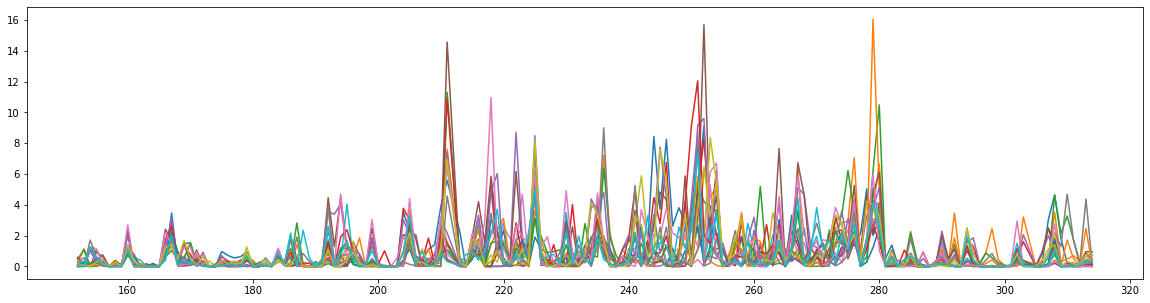

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in train_df['rainfall_train.stn4contest'].unique():
    plt.plot(train_df[train_df['rainfall_train.stn4contest'] == i].groupby(by=['day'])['rainfall_train.vv'].mean(),label=i)
    # print(train_df[train_df['rainfall_train.stn4contest'] == i]['rainfall_train.vv'].to_numpy())

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

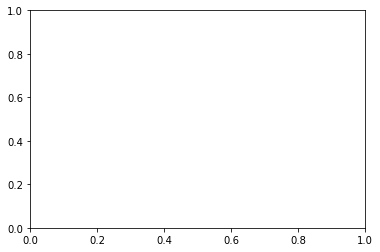

In [5]:
import seaborn as sns 

dhpvalueD= test_df.groupby(by=['rainfall_test.stn4contest', 'rainfall_test.ef_year',
       'rainfall_test.ef_month', 'rainfall_test.ef_day',
       'rainfall_test.ef_hour'])['rainfall_test.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueA= _A.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueB= _B.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()
dhpvalueC= _C.groupby(by=['rainfall_train.stn4contest', 'rainfall_train.ef_year',
       'rainfall_train.ef_month', 'rainfall_train.ef_day',
       'rainfall_train.ef_hour'])['rainfall_train.dh_x'].min().reset_index(drop=True).value_counts()

sns.lineplot(dhpvalueD.sort_index(), label='D')
sns.lineplot(dhpvalueA.sort_index(), label='A')
sns.lineplot(dhpvalueB.sort_index(), label='B')
sns.lineplot(dhpvalueC.sort_index(), label='C')



ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

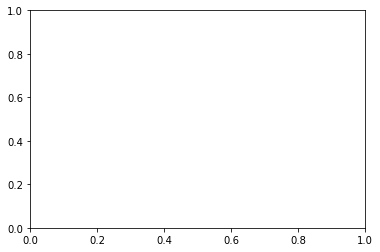

In [6]:
from util import make_day2class


for i in range(1,21):
    sns.kdeplot(make_day2class(_A[_A['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

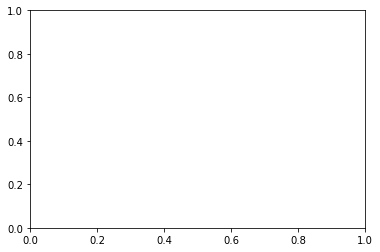

In [7]:
from util import make_day2class


for i in range(1,21):
    sns.lineplot(make_day2class(_B[_B['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/home/encore/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


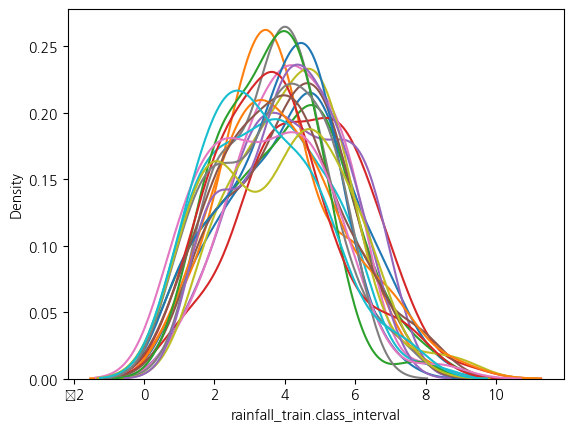

In [ ]:
from util import make_day2class


for i in range(1,21):
    sns.kdeplot(make_day2class(_C[_C['rainfall_train.stn4contest'] == f'STN{format(i, "03")}'])['rainfall_train.class_interval'], label=f"STN{i}")

In [ ]:
print(len(_A))
print(len(_B))
print(len(_C))


4630
3994
3362


<Axes: ylabel='rainfall_train.class_interval'>

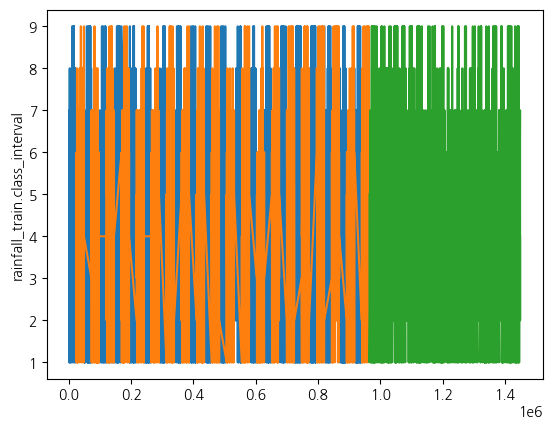

In [ ]:
sns.lineplot(_A['rainfall_train.class_interval'])

sns.lineplot(_B['rainfall_train.class_interval'])
sns.lineplot(_C['rainfall_train.class_interval'])




In [ ]:
train_df[['rainfall_train.ef_hour', 'rainfall_train.v01', 'rainfall_train.v02',
       'rainfall_train.v03', 'rainfall_train.v04', 'rainfall_train.v05',
       'rainfall_train.v06', 'rainfall_train.v07', 'rainfall_train.v08',
       'rainfall_train.v09']]

,rainfall_train.ef_hour,rainfall_train.v01,rainfall_train.v02,rainfall_train.v03,rainfall_train.v04,rainfall_train.v05,rainfall_train.v06,rainfall_train.v07,rainfall_train.v08,rainfall_train.v09
1123,21,0.04,0.15,0.14,0.28,0.28,0.00,0.00,0.0,0.0
1200,0,0.00,0.00,0.00,0.00,0.04,0.68,0.28,0.0,0.0
1201,3,0.00,0.00,0.00,0.00,0.13,0.85,0.02,0.0,0.0
1202,6,0.00,0.00,0.00,0.04,0.58,0.38,0.00,0.0,0.0
1203,9,0.00,0.00,0.00,0.00,0.11,0.71,0.18,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1448756,6,0.02,0.05,0.00,0.02,0.00,0.00,0.00,0.0,0.0
1448757,9,0.02,0.05,0.00,0.02,0.00,0.00,0.00,0.0,0.0
1448759,15,0.04,0.04,0.02,0.02,0.01,0.00,0.00,0.0,0.0
1448760,18,0.02,0.02,0.02,0.00,0.02,0.00,0.00,0.0,0.0


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=9)
pca.fit(train_df[['rainfall_train.v01', 'rainfall_train.v02',
       'rainfall_train.v03', 'rainfall_train.v04', 'rainfall_train.v05',
       'rainfall_train.v06', 'rainfall_train.v07', 'rainfall_train.v08',
       'rainfall_train.v09']].values)

PCA(n_components=9)

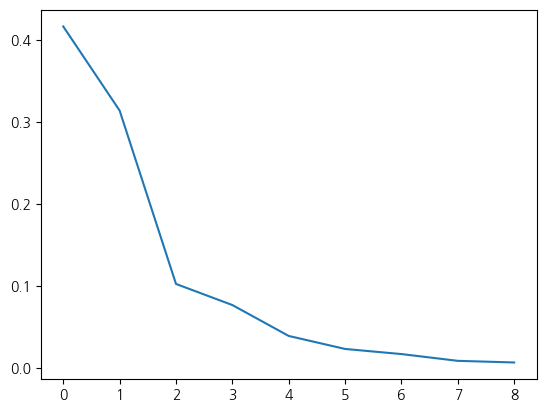

In [ ]:
import matplotlib.pyplot as plt
plt.plot(pca.explained_variance_ratio_)
